In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
# prefix = "../build/"
prefix = "./removingGP/"


df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,1.175850,-0.004560,1.10967,0.022761,0.023681,0.023595,1.202200,-0.031574,1.12733,5,1.198611,0.019122,1.133265,1.153089,-0.028241,1.086075
1,1.105410,0.000448,1.12214,0.022767,0.023622,0.023541,1.131460,-0.026449,1.13970,3,1.128178,0.024069,1.145681,1.082642,-0.023174,1.098599
2,1.017240,0.082129,1.15488,0.022814,0.023557,0.023501,1.043190,0.055589,1.17232,3,1.040054,0.105686,1.178381,0.994426,0.058573,1.131379
3,1.002180,-0.036721,1.12418,0.022756,0.023533,0.023454,1.027760,-0.063501,1.14120,3,1.024937,-0.013188,1.147634,0.979424,-0.060254,1.100726
4,0.932151,-0.042924,1.08780,0.022773,0.023522,0.023426,0.959302,-0.072795,1.10631,3,0.954924,-0.019402,1.111226,0.909378,-0.066446,1.064374


<IPython.core.display.Javascript object>


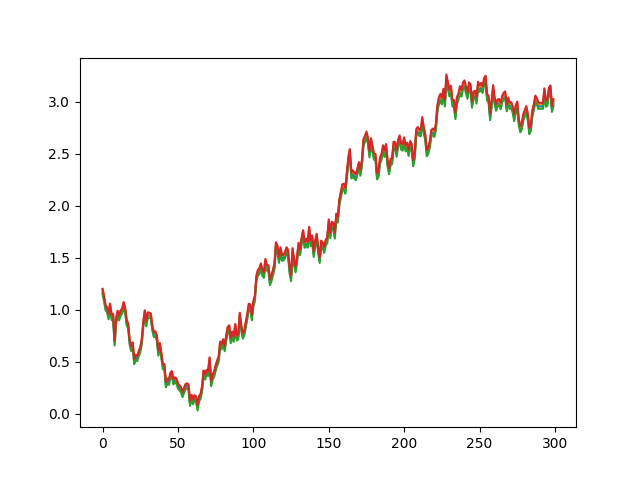

<IPython.core.display.Javascript object>


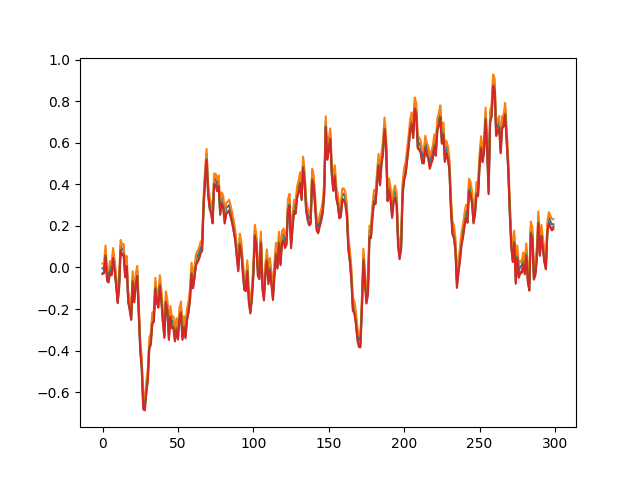

<IPython.core.display.Javascript object>


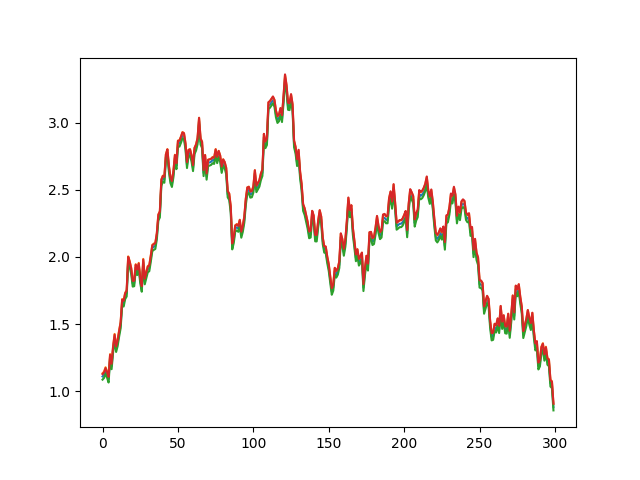

In [3]:
plt.plot(df.index, df['x'])
plt.plot(df.index, df['x+'])
plt.plot(df.index, df['x-'])
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.plot(df.index, df['y+'])
plt.plot(df.index, df['y-'])
plt.plot(df.index, df['gnd_y'])


plt.figure()

plt.plot(df.index, df['z'])
plt.plot(df.index, df['z+'])
plt.plot(df.index, df['z-'])
plt.plot(df.index, df['gnd_z'])

plt.show()


<IPython.core.display.Javascript object>


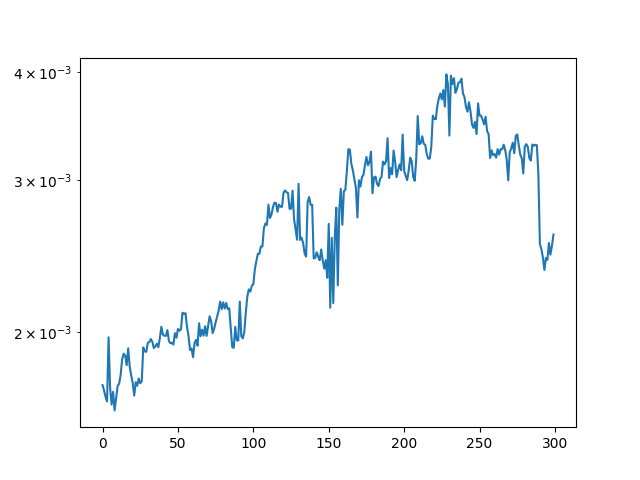

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)

plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


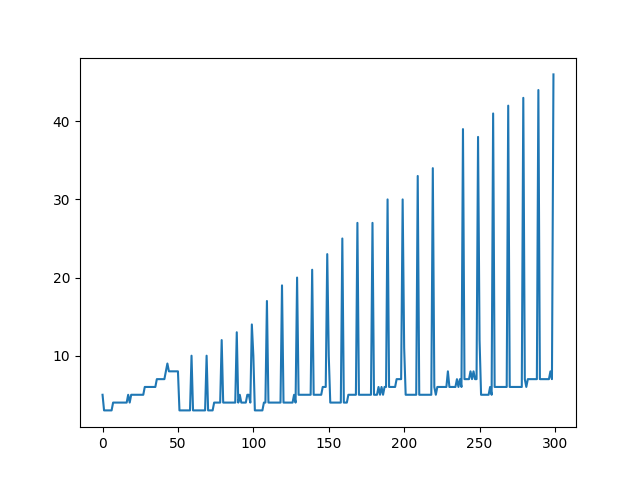

In [5]:
plt.figure()
plt.plot(df.index, df['time'])
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


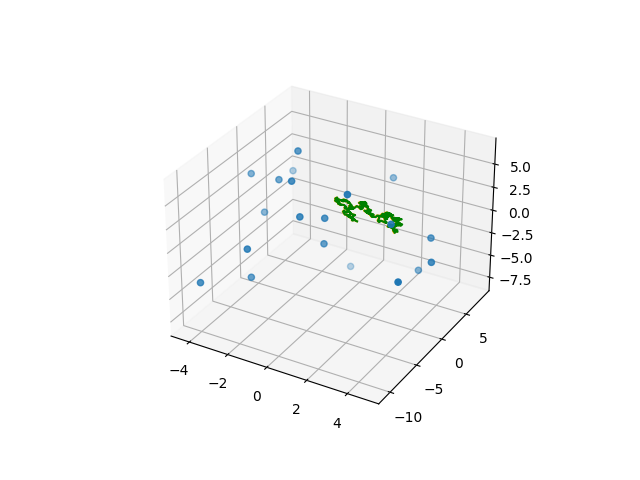

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")

